# <span style="color:purple"> Final Project The Economist Semantic Analysis

In [2]:
import lucem_illud 

import pandas #gives us DataFrames
import numpy as np #For divergences/distances
import scipy #For divergences/ distances/ hierarchical clustering and some visuals

import nltk #the Natural Language Toolkit
from nltk.corpus import stopwords #For stopwords

import seaborn as sns #makes our plots look nicer
import matplotlib.pyplot as plt #For graphics
import matplotlib.cm #Still for graphics
import wordcloud #Makes word clouds

#These are all for the cluster detection
import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics
import sklearn.manifold #For a manifold plot

import gensim#For topic modeling

from bs4 import BeautifulSoup
import requests #for http requests
from requests import get
import urllib.parse #For joining urls
import re #for regexs
import json #For API responses

import itertools

%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## <span style="color:purple"> Week 1 & Week 2
<span style="color:purple">The corpus is saved in the file named "ECONOMIST_New.csv". <br>
It has been processed with the steps discessued in Week 1 and Week 2. <br>

<span style="color:purple">**Step 1:** Parse the .xml file and save all the information in the data frame. <br>
<span style="color:purple">**Step 2:** Coarse grain the corpus by tokenization, normalization, stoping list, and stemming. After these basic processing, the dimensionality of the corpus is largely reduced. For instance, the word counts in Fin_econ decrease from 2304689 to 1082567; in Business decrease from 2486335 to 1172374; in Sci_tech decrease from 870651 to 402963; and in Book_art decrease from 1405589 to 649146. <br>
<span style="color:purple">**Step 3:** Focus on the word frequencies, the comparison cross sectors as well as time variance. 

In [2]:
Economist = pandas.read_csv('ECONOMIST_New.csv')

In [ ]:
del Economist['Unnamed: 0']
Economist[:10]

In [7]:
Topics = ['Leaders', 'Britain', 'Europe', 'United States', 'The Americas', 
              'Middle East and Africa', 'Asia', 'Obituary',
              'Business', 'Finance and economics', 'Science and technology', 'Books and arts']

years = ['2006','2007','2008','2009','2010']

### <span style="color:purple">  Frequency of "crisis"
<span style="color:purple"> Fig 1: Use the whole corpus <br>
<span style="color:purple"> Fig 2: Loop the 4 sectors {'Business', 'Finance and economics', 'Science and technology', 'Books and arts'} <br>
<span style="color:purple"> Fig 3: Loop the different regions/ areas {'Britain', 'Europe', 'United States', 'The Americas', 'Middle East and Africa', 'Asia'} <br>

In [4]:
def wordCounter(wordLst):
    wordCounts = {}
    for word in wordLst:
        #We usually need to normalize the case
        wLower = word.lower()
        if wLower in wordCounts:
            wordCounts[wLower] += 1
        else:
            wordCounts[wLower] = 1
    #convert to DataFrame
    countsForFrame = {'word' : [], 'count' : []}
    for w, c in wordCounts.items():
        countsForFrame['word'].append(w)
        countsForFrame['count'].append(c)
    return pandas.DataFrame(countsForFrame)

### <span style="color:purple"> For Figure 1

In [11]:
E = pandas.read_csv('Economist_Token_Neat.csv')

In [12]:
Economist = E
Time_y = []
Time_m = []
Total_word_num = []
Target_num = []
Date = []

target = 'crisis'
for year in years: 
    E_year = Economist[Economist.Year == int(year)]
    for month in range(1,13):
        E_month = E_year[E_year.Month == month]
        E_month = E_month.reset_index()
        del E_month['index']
        
        total_word_num = 0 # monthly
        target_num = 0
        for i in range(0, len(E_month)-1):
            article = E_month['Article'][i]
            
            article_tokens = nltk.word_tokenize(article)
            article_countedWords = wordCounter(article_tokens)

            total_word_num = total_word_num + sum(list(article_countedWords['count']))
            if list(article_countedWords[article_countedWords.word == target]['count']) == []:
                target_num = target_num + 0
            else: 
                target_num = target_num + list(article_countedWords[article_countedWords.word == target]['count'])[0]
        
        Total_word_num.append(total_word_num)
        Target_num.append(target_num)
        Time_y.append(int(year))
        Time_m.append(month)
        Date.append(year+'-'+str(month))
        print('finish year '+ year+' and month '+str(month))



finish year 2006 and month 1
finish year 2006 and month 2
finish year 2006 and month 3
finish year 2006 and month 4
finish year 2006 and month 5
finish year 2006 and month 6
finish year 2006 and month 7
finish year 2006 and month 8
finish year 2006 and month 9
finish year 2006 and month 10
finish year 2006 and month 11
finish year 2006 and month 12
finish year 2007 and month 1
finish year 2007 and month 2
finish year 2007 and month 3
finish year 2007 and month 4
finish year 2007 and month 5
finish year 2007 and month 6
finish year 2007 and month 7
finish year 2007 and month 8
finish year 2007 and month 9
finish year 2007 and month 10
finish year 2007 and month 11
finish year 2007 and month 12
finish year 2008 and month 1
finish year 2008 and month 2
finish year 2008 and month 3
finish year 2008 and month 4
finish year 2008 and month 5
finish year 2008 and month 6
finish year 2008 and month 7
finish year 2008 and month 8
finish year 2008 and month 9
finish year 2008 and month 10
finish 

In [13]:
Freq_table_All = pandas.DataFrame({'Time_y': Time_y, 'Time_m': Time_m, 
                                   'Total_word_num': Total_word_num, target+'_num': Target_num})
Freq_table_All = Freq_table_All[['Time_y', 'Time_m', 'Total_word_num', target+'_num']]

In [14]:
Freq_table_All.to_csv('Freq_table_crisis.csv', sep=',')

### <span style="color:purple"> For Figure 2 & 3

In [27]:
Economist = E

Time_y = []
Time_m = []
Target_num = []
Total_word_num = []
Target_percent = []

target = 'national'
tag = 'Asia'
# 'Business', 'Finance and economics', 'Science and technology', 'Books and arts'
#  'Britain', 'Europe', 'United States', 'The Americas', 'Middle East and Africa', 'Asia',
for year in years: 
    E_year = Economist[Economist.Year == int(year)]
    for month in range(1,13):
        E_month = E_year[E_year.Month == month]
        E_sector = E_month[E_month.Tag == tag]
        E_sector = E_sector.reset_index()
        del E_sector['index']
        
        total_word_num = 0 # monthly
        target_num = 0
        for i in range(0, len(E_sector)-1):
            article = E_sector['Article'][i]
            
            article_tokens = nltk.word_tokenize(article)
            article_countedWords = wordCounter(article_tokens)
            total_word_num = total_word_num + sum(list(article_countedWords['count']))

        
            if list(article_countedWords[article_countedWords.word == target]['count']) == []:
                target_num = target_num + 0
            else: 
                target_num = target_num + list(article_countedWords[article_countedWords.word == target]['count'])[0]
        
        
        Target_num.append(target_num)
        Time_y.append(int(year))
        Time_m.append(month)
        Total_word_num.append(total_word_num)
        Target_percent.append(target_num/total_word_num)
        print('finish year '+ year+' and month '+str(month))



finish year 2006 and month 1
finish year 2006 and month 2
finish year 2006 and month 3
finish year 2006 and month 4
finish year 2006 and month 5
finish year 2006 and month 6
finish year 2006 and month 7
finish year 2006 and month 8
finish year 2006 and month 9
finish year 2006 and month 10
finish year 2006 and month 11
finish year 2006 and month 12
finish year 2007 and month 1
finish year 2007 and month 2
finish year 2007 and month 3
finish year 2007 and month 4
finish year 2007 and month 5
finish year 2007 and month 6
finish year 2007 and month 7
finish year 2007 and month 8
finish year 2007 and month 9
finish year 2007 and month 10
finish year 2007 and month 11
finish year 2007 and month 12
finish year 2008 and month 1
finish year 2008 and month 2
finish year 2008 and month 3
finish year 2008 and month 4
finish year 2008 and month 5
finish year 2008 and month 6
finish year 2008 and month 7
finish year 2008 and month 8
finish year 2008 and month 9
finish year 2008 and month 10
finish 

In [28]:
Freq_table_All = pandas.DataFrame({'Time_y': Time_y, 'Time_m': Time_m, 
                                   target+'_num': Target_num,
                                  'Total_word_num':Total_word_num,
                                  'Target_percent': Target_percent})
Freq_table_All = Freq_table_All[['Time_y', 'Time_m', 'Total_word_num', 'Target_percent',  target+'_num']]

In [29]:
Freq_table_All.to_csv('Freq_table_Asia_crisis.csv', sep=',')

### <span style="color:purple"> Week 4: Word Embeddings
<span style="color:purple"> Fig 1: visualize the word "bush", "obama", "beranke" by year <br>
<span style="color:purple"> Pairs: X+Y = Z+ <br>
<span style="color:purple"> Fig 3: Loop the different regions/ areas {'Britain', 'Europe', 'United States', 'The Americas', 'Middle East and Africa', 'Asia'} <br>

In [280]:
Economist[:3]

,Unnamed: 0,Year,Month,Day,Title,Tag,Article,Tokenized_Words,Normalized_Words,tokenized_sents,normalized_sents
0,0,2006,1,14,Nuclear proliferation Misreading Iran,Leaders,\n\t\t\tSpecial report Iran's nuclear programm...,"['Special', 'report', 'Iran', ""'s"", 'nuclear',...","['special', 'report', 'iran', 'nuclear', 'prog...","[['Special', 'report', 'Iran', ""'s"", 'nuclear'...","[['special', 'report', 'iran', 'nuclear', 'pro..."
1,1,2006,1,14,UN reform Fix it or scrap it,Leaders,\n\t\t\tMexico and the United States Shots acr...,"['Mexico', 'and', 'the', 'United', 'States', '...","['mexico', 'unit', 'state', 'shot', 'across', ...","[['Mexico', 'and', 'the', 'United', 'States', ...","[['mexico', 'united', 'states', 'shots', 'acro..."
2,2,2006,1,14,Spain and its regions A Catalan kerfuffle,Leaders,\n\t\t\tSpain and Catalonia Bad echoes from th...,"['Spain', 'and', 'Catalonia', 'Bad', 'echoes',...","['spain', 'catalonia', 'bad', 'echo', 'past', ...","[['Spain', 'and', 'Catalonia', 'Bad', 'echoes'...","[['spain', 'catalonia', 'bad', 'echoes', 'past..."


In [182]:
Economist['tokenized_sents'] = Economist['Article'].apply(lambda x: 
                                                               [nltk.word_tokenize(s) for s in nltk.sent_tokenize(x)])
Economist['normalized_sents'] = Economist['tokenized_sents'].apply(lambda x: 
                                                                           [lucem_illud.normalizeTokens(s, 
                                                                                           stopwordLst = lucem_illud.stop_words_basic, 
                                                                                           stemmer = None) 
                                                                            for s in x])

Economist[:5]

,Year,Month,Day,Title,Tag,Article,Tokenized_Words,Normalized_Words,tokenized_sents,normalized_sents
0,2006,1,14,Nuclear proliferation Misreading Iran,Leaders,\n\t\t\tSpecial report Iran's nuclear programm...,"['Special', 'report', 'Iran', ""'s"", 'nuclear',...","['special', 'report', 'iran', 'nuclear', 'prog...","[[Special, report, Iran, 's, nuclear, programm...","[[special, report, iran, nuclear, programme, s..."
1,2006,1,14,UN reform Fix it or scrap it,Leaders,\n\t\t\tMexico and the United States Shots acr...,"['Mexico', 'and', 'the', 'United', 'States', '...","['mexico', 'unit', 'state', 'shot', 'across', ...","[[Mexico, and, the, United, States, Shots, acr...","[[mexico, united, states, shots, across, borde..."
2,2006,1,14,Spain and its regions A Catalan kerfuffle,Leaders,\n\t\t\tSpain and Catalonia Bad echoes from th...,"['Spain', 'and', 'Catalonia', 'Bad', 'echoes',...","['spain', 'catalonia', 'bad', 'echo', 'past', ...","[[Spain, and, Catalonia, Bad, echoes, from, th...","[[spain, catalonia, bad, echoes, past, madrid,..."
3,2006,1,14,Walls and fences On America's southern border,Leaders,n.a.,"['n.a', '.']",[],"[[n.a, .]]",[[]]
4,2006,1,14,Anti-social behaviour Soothing the savage breast,Britain,\n\t\t\tBritain\n\t\t\tAnti-social behaviour S...,"['Britain', 'Anti-social', 'behaviour', 'Sooth...","['britain', 'behaviour', 'sooth', 'savag', 'br...","[[Britain, Anti-social, behaviour, Soothing, t...","[[britain, behaviour, soothing, savage, breast..."


In [183]:
Economist.to_csv('Economist_15th.csv', sep=',')

In [2]:
Economist = pandas.read_csv('Economist_15th.csv')

In [3]:
del Economist['Unnamed: 0']
Economist[:3]

,Year,Month,Day,Title,Tag,Article,Tokenized_Words,Normalized_Words,tokenized_sents,normalized_sents
0,2006,1,14,Nuclear proliferation Misreading Iran,Leaders,\n\t\t\tSpecial report Iran's nuclear programm...,"['Special', 'report', 'Iran', ""'s"", 'nuclear',...","['special', 'report', 'iran', 'nuclear', 'prog...","[['Special', 'report', 'Iran', ""'s"", 'nuclear'...","[['special', 'report', 'iran', 'nuclear', 'pro..."
1,2006,1,14,UN reform Fix it or scrap it,Leaders,\n\t\t\tMexico and the United States Shots acr...,"['Mexico', 'and', 'the', 'United', 'States', '...","['mexico', 'unit', 'state', 'shot', 'across', ...","[['Mexico', 'and', 'the', 'United', 'States', ...","[['mexico', 'united', 'states', 'shots', 'acro..."
2,2006,1,14,Spain and its regions A Catalan kerfuffle,Leaders,\n\t\t\tSpain and Catalonia Bad echoes from th...,"['Spain', 'and', 'Catalonia', 'Bad', 'echoes',...","['spain', 'catalonia', 'bad', 'echo', 'past', ...","[['Spain', 'and', 'Catalonia', 'Bad', 'echoes'...","[['spain', 'catalonia', 'bad', 'echoes', 'past..."


### <span style="color:purple"> Visualize

In [96]:
# Topics = ['Leaders', 'Britain', 'Europe', 'United States', 'The Americas', 
#'Middle East and Africa', 'Asia', 'Obituary',
#'Business', 'Finance and economics', 'Science and technology', 'Books and arts']

E = pandas.read_csv('Economist_15th.csv')

In [660]:
Economist = E
E_year = Economist[Economist.Year == 2009]
E_area = E_year[E_year.Tag == 'Science and technology']
Economist = E_area
#Economist = E_year

In [661]:
Economist[:2]

,Unnamed: 0,Year,Month,Day,Title,Tag,Article,Tokenized_Words,Normalized_Words,tokenized_sents,normalized_sents
10554,10554,2009,1,3,"Numbers Easy as 1, 2,",Science and technology,\n\t\t\tPlenty more fish in the sea?\n\t\t\tNo...,"['Plenty', 'more', 'fish', 'in', 'the', 'sea',...","['plenti', 'fish', 'sea', 'longer', 'technolog...","[['Plenty', 'more', 'fish', 'in', 'the', 'sea'...","[['plenty', 'fish', 'sea'], ['longer', 'techno..."
10555,10555,2009,1,3,"64 More numbers When 1,2, 3... is not enough",Science and technology,\n\t\t\tPlenty more fish in the sea?\n\t\t\tNo...,"['Plenty', 'more', 'fish', 'in', 'the', 'sea',...","['plenti', 'fish', 'sea', 'longer', 'technolog...","[['Plenty', 'more', 'fish', 'in', 'the', 'sea'...","[['plenty', 'fish', 'sea'], ['longer', 'techno..."


In [662]:
del Economist['Tokenized_Words']

In [663]:
del Economist['Normalized_Words']

In [664]:
del Economist['tokenized_sents']

In [665]:
del Economist['normalized_sents']

In [666]:
del Economist['Unnamed: 0']

In [667]:
Economist[:2]

,Year,Month,Day,Title,Tag,Article
10554,2009,1,3,"Numbers Easy as 1, 2,",Science and technology,\n\t\t\tPlenty more fish in the sea?\n\t\t\tNo...
10555,2009,1,3,"64 More numbers When 1,2, 3... is not enough",Science and technology,\n\t\t\tPlenty more fish in the sea?\n\t\t\tNo...


In [668]:
# Tokenize and normalize the texts
Economist['tokenized_sents'] = Economist['Article'].apply(lambda x: 
                                                               [nltk.word_tokenize(s) for s in nltk.sent_tokenize(x)])
Economist['normalized_sents'] = Economist['tokenized_sents'].apply(lambda x: 
                                                                           [lucem_illud.normalizeTokens(s, 
                                                                                           stopwordLst = lucem_illud.stop_words_basic, 
                                                                                           stemmer = None) 
                                                                            for s in x])

Economist[:5]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Year,Month,Day,Title,Tag,Article,tokenized_sents,normalized_sents
10554,2009,1,3,"Numbers Easy as 1, 2,",Science and technology,\n\t\t\tPlenty more fish in the sea?\n\t\t\tNo...,"[[Plenty, more, fish, in, the, sea, ?], [No, l...","[[plenty, fish, sea], [longer, technology, mad..."
10555,2009,1,3,"64 More numbers When 1,2, 3... is not enough",Science and technology,\n\t\t\tPlenty more fish in the sea?\n\t\t\tNo...,"[[Plenty, more, fish, in, the, sea, ?], [No, l...","[[plenty, fish, sea], [longer, technology, mad..."
10635,2009,1,10,"Science policy Blessed are the geeks, for they...",Science and technology,\n\t\t\tScience and technology\n\t\t\tBlessed ...,"[[Science, and, technology, Blessed, are, the,...","[[science, technology, blessed, geeks, shall, ..."
10636,2009,1,10,The environment Green Bush,Science and technology,\n\t\t\tAppointments DFD gainst world poverty ...,"[[Appointments, DFD, gainst, world, poverty, S...","[[appointments, dfd, gainst, world, poverty, s..."
10637,2009,1,10,Astronomy The cosmic boogie-box,Science and technology,\n\t\t\tThe cosmic boogie-box\n\t\t\tAstronomy...,"[[The, cosmic, boogie-box, Astronomy, The, sky...","[[cosmic, astronomy, sky, seems, filled, unexp..."


In [669]:
# word to vector
EconomistW2V = gensim.models.word2vec.Word2Vec(Economist['normalized_sents'].sum())
# see the vector of word "fish"
# CookBookW2V['fish']

In [670]:
# words and their frequencies -- generate the list of representative words
Economist['tokenized_text'] = Economist['Article'].apply(lambda x: nltk.word_tokenize(x))
countsDict = {}
for word in Economist['tokenized_text'].sum():
    if word in countsDict:
        countsDict[word] += 1
    else:
        countsDict[word] = 1
word_counts = sorted(countsDict.items(), key = lambda x : x[1], reverse = True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [671]:
EconomistW2V.most_similar('crisis')

[('food', 0.9997553825378418),
 ('energy', 0.9997526407241821),
 ('tion', 0.9997520446777344),
 ('research', 0.9997515678405762),
 ('even', 0.9997509121894836),
 ('also', 0.9997484087944031),
 ('less', 0.9997453689575195),
 ('high', 0.9997453689575195),
 ('new', 0.999744713306427),
 ('fish', 0.999742865562439)]

In [672]:
# I will only target the top 200 words in the list
numWords = 100
targetWords = EconomistW2V.wv.index2word[150:numWords]


stop_words_nltk = stopwords.words('english')

#The stemmers and lemmers need to be initialized before bing run
porter = nltk.stem.porter.PorterStemmer()
snowball = nltk.stem.snowball.SnowballStemmer('english')
wordnet = nltk.stem.WordNetLemmatizer()

def normlizeTokens(tokenLst, stopwordLst = None, stemmer = None, lemmer = None):

    #Lowering the case and removing non-words
    workingIter = (w.lower() for w in tokenLst if w.isalpha())

    #Now we can use the semmer, if provided
    if stemmer is not None:
        workingIter = (stemmer.stem(w) for w in workingIter)
        
    #And the lemmer
    if lemmer is not None:
        workingIter = (lemmer.lemmatize(w) for w in workingIter)
    
    #And remove the stopwords
    if stopwordLst is not None:
        workingIter = (w for w in workingIter if w not in stopwordLst)
    #We will return a list with the stopwords removed
    return list(workingIter)

Economist['normalized_tokens'] = Economist['tokenized_text'].apply(lambda x: normlizeTokens(x, stopwordLst = stop_words_nltk, stemmer = None))

Economist['normalized_tokens_count'] = Economist['normalized_tokens'].apply(lambda x: len(x))

Economist.sort_values(by='normalized_tokens_count', ascending=False)[:3]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Year,Month,Day,Title,Tag,Article,tokenized_sents,normalized_sents,tokenized_text,normalized_tokens,normalized_tokens_count
12097,2009,5,16,Wolfram Alpha The search is on,Science and technology,\n\t\t\tThe revolution within\n\t\t\tTheway ba...,"[[The, revolution, within, Theway, banks, mana...","[[revolution, within, theway, banks, manage, h...","[The, revolution, within, Theway, banks, manag...","[revolution, within, theway, banks, manage, ho...",1806
13695,2009,9,26,Paying to save trees Last gasp for the forest,Science and technology,\n\t\t\tSaence and technology\n\t\t\tLast gasp...,"[[Saence, and, technology, Last, gasp, for, th...","[[saence, technology, last, gasp, forest, payi...","[Saence, and, technology, Last, gasp, for, the...","[saence, technology, last, gasp, forest, payin...",1576
14483,2009,12,5,Climate change What lies beneath,Science and technology,\n\t\t\tAdvertising feature 1 Towards a sustai...,"[[Advertising, feature, 1, Towards, a, sustain...","[[advertising, feature, towards, sustainable, ...","[Advertising, feature, 1, Towards, a, sustaina...","[advertising, feature, towards, sustainable, f...",1456


In [673]:
wordsSubMatrix = []
for word in targetWords:
    wordsSubMatrix.append(EconomistW2V[word])
wordsSubMatrix = np.array(wordsSubMatrix)
wordsSubMatrix

array([], dtype=float64)

In [ ]:
pcaWords = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix)
reducedPCA_data = pcaWords.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWords = sklearn.manifold.TSNE(n_components = 2, early_exaggeration = 25).fit_transform(reducedPCA_data)

In [ ]:
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWords[:, 0], tsneWords[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(targetWords):
    ax.annotate(word, 
                (tsneWords[:, 0][i],tsneWords[:, 1][i]), 
                size =  20 * (numWords - i) / numWords, 
                alpha = .8 * (numWords - i) / numWords + .2)
plt.xticks(())
plt.yticks(())
plt.show()

### <span style="color:purple"> Week 8 Network

In [675]:
Topics = ['Leaders', 'Britain', 'Europe', 'United States', 'The Americas', 
              'Middle East and Africa', 'Asia', 'Obituary',
              'Business', 'Finance and economics', 'Science and technology', 'Books and arts']

years = ['2006','2007','2008','2009','2010']

In [691]:
Nodes = []
Title = []
for t in Topics: 
    f = open('ALL' + t +'.txt','r')
    file = f.read()
    f.close()
    Nodes.append(file)
    Title.append('ALL' + t +'.txt')

In [692]:
nw = pandas.DataFrame({'Nodes': Nodes, 'Title': Title})

In [ ]:
nw['normalized_sentences'] = nw['tokenized_sentences'].apply(lambda x: [lucem_illud.normalizeTokens(s, stopwordLst = lucem_illud.stop_words_basic, stemmer = lucem_illud.stemmer_basic) for s in x])


In [ ]:
def wordCooccurrence(sentences, makeMatrix = False):
    words = set()
    for sent in sentences:
        words |= set(sent)
    wordLst = list(words)
    wordIndices = {w: i for i, w in enumerate(wordLst)}
    wordCoCounts = {}
    #consider a sparse matrix if memory becomes an issue
    coOcMat = np.zeros((len(wordIndices), len(wordIndices)))
    for sent in sentences:
        for i, word1 in enumerate(sent):
            word1Index = wordIndices[word1]
            for word2 in sent[i + 1:]:
                coOcMat[word1Index][wordIndices[word2]] += 1
    if makeMatrix:
        return coOcMat, wordLst
    else:
        coOcMat = coOcMat.T + coOcMat
        g = nx.convert_matrix.from_numpy_matrix(coOcMat)
        g = nx.relabel_nodes(g, {i : w for i, w in enumerate(wordLst)})
        return g

In [ ]:
g_nw = wordCooccurrence(nw['normalized_sentences'][:100].sum())

In [ ]:
nx.draw_networkx(g_nw)
plt.savefig("nw.png")

### <span style="color:purple"> Document-Document Network

In [686]:
def tokenize(text):
    tokenlist = nltk.word_tokenize(text)
    normalized = lucem_illud.normalizeTokens(tokenlist, stopwordLst = lucem_illud.stop_words_basic, stemmer = lucem_illud.stemmer_basic)
    return normalized

In [689]:
senVectorizer = sklearn.feature_extraction.text.CountVectorizer(tokenizer = tokenize)
senVects_incidence_nw = senVectorizer.fit_transform(nw['Nodes'])


In [ ]:
import networkx as nx

g_2mode = nx.Graph()

#define all the nodes
g_2mode.add_nodes_from((senVectorizer.get_feature_names()[i] for i in range(senVects_incidence_nw.shape[1])), bipartite = 'word')
g_2mode.add_nodes_from(range(senVects_incidence_nw.shape[0]), bipartite = 'doc')
#add all the edges
g_2mode.add_edges_from(((d, senVectorizer.get_feature_names()[w], {'weight' : senVects_incidence_nw[d, w]}) for d, w in zip(*senVects_incidence_nw.nonzero())))

print(nx.info(g_2mode))

In [698]:
def contractNetwork(g, targetType):
    g_mono = nx.Graph()
    g_mono.add_nodes_from(((n, d) for n, d in g.nodes(data = True) if d['bipartite'] == targetType))
    
    for n_outside in (n for n, d in g.nodes(data = True) if d['bipartite'] != targetType):
        neighbors = list((n for n in g.neighbors(n_outside) if g.nodes[n]['bipartite'] == targetType))
        for i, n1 in enumerate(neighbors):
            for n2 in neighbors[i+1:]:
                try:
                    g_mono.edges[n1, n2]['weight'] += 1
                except KeyError:
                    g_mono.add_edge(n1, n2, weight = 1)
    return g_mono

In [699]:
gDoc = contractNetwork(g_2mode, 'doc')
# Document to document network
print(nx.info(gDoc))

Name: 
Type: Graph
Number of nodes: 0
Number of edges: 0



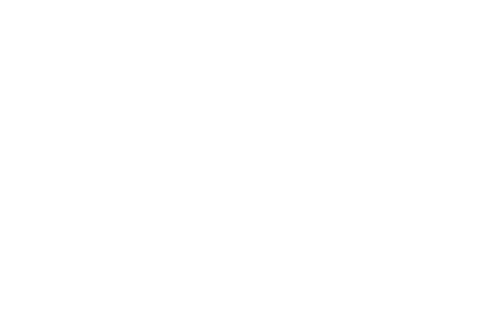

In [700]:
layout = nx.spring_layout(gDoc, k = 1/3, weight='weight', iterations= 50)
nx.draw(gDoc, pos = layout, labels = {n:n for n in gDoc.nodes()}) #Getting labels is a bit annoying